In [13]:
%cd ~/improved-ddgan/

/home/users/std/2021/21k0005/improved-ddgan


/home/users/std/2021/21k0005/improved-ddgan/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/users/std/2021/21k0005/improved-ddgan/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [14]:
from pytorch_fid.fid_score import calculate_fid_given_paths

In [56]:
#save_dir = "../pytorch-ddpm/generated_images/"
real_img_dir = "pytorch_fid/cifar10_train_stat.npy"
save_dir = "data/cifar-10/train/"
#real_img_dir = "../pytorch-ddpm/stats/cifar10.train.npz"
paths = [save_dir, real_img_dir]
device = "cuda:0"
kwargs = {'batch_size': 100, 'device': device, 'dims': 2048}
fid = calculate_fid_given_paths(paths=paths, **kwargs)
print('FID = {}'.format(fid))

/home/users/std/2021/21k0005/improved-ddgan/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/users/std/2021/21k0005/improved-ddgan/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:26<00:00, 19.02it/s]


FID = 16.71886434727128


In [19]:
import numpy as np

In [21]:
a = np.load("pytorch_fid/cifar10_train_stat.npy", allow_pickle=True)

In [37]:
a = a.item()

In [38]:
a

{'mu': array([0.07745414, 0.25598865, 0.31927318, ..., 0.60621447, 0.37577071,
        0.64444193]),
 'sigma': array([[ 8.13178156e-03,  1.26834842e-03, -1.36604568e-03, ...,
          1.05458504e-02, -7.49273273e-04, -6.39010910e-05],
        [ 1.26834842e-03,  4.89064911e-02, -1.26454872e-03, ...,
          6.56855905e-03,  6.03934756e-03, -7.69578033e-03],
        [-1.36604568e-03, -1.26454872e-03,  4.68894818e-02, ...,
         -2.55639565e-02,  4.50058036e-03,  2.30507259e-03],
        ...,
        [ 1.05458504e-02,  6.56855905e-03, -2.55639565e-02, ...,
          2.92388776e-01,  1.63455075e-02,  7.57669617e-03],
        [-7.49273273e-04,  6.03934756e-03,  4.50058036e-03, ...,
          1.63455075e-02,  9.20091746e-02, -3.22354572e-03],
        [-6.39010910e-05, -7.69578033e-03,  2.30507259e-03, ...,
          7.57669617e-03, -3.22354572e-03,  1.73306099e-01]])}

In [24]:
b = np.load("../pytorch-ddpm/stats/cifar10.train.npz")

In [28]:
b["mu"]

array([0.09976815, 0.24318894, 0.29826408, ..., 0.50716553, 0.39214521,
       0.64979453])

In [29]:
b["sigma"]

array([[ 0.01227427,  0.00172983, -0.00055732, ...,  0.00894856,
        -0.00092401,  0.00190969],
       [ 0.00172983,  0.04174218,  0.00064635, ...,  0.00472976,
         0.00550685,  0.00047681],
       [-0.00055732,  0.00064635,  0.0442294 , ..., -0.02097971,
         0.00257907,  0.00124318],
       ...,
       [ 0.00894856,  0.00472976, -0.02097971, ...,  0.22309812,
         0.01451769,  0.0094839 ],
       [-0.00092401,  0.00550685,  0.00257907, ...,  0.01451769,
         0.10454543, -0.00578467],
       [ 0.00190969,  0.00047681,  0.00124318, ...,  0.0094839 ,
        -0.00578467,  0.18074908]])

In [39]:
c = b["mu"]-a["mu"]

In [40]:
d = b["sigma"] - a["sigma"]

In [45]:
c

array([ 0.02231401, -0.01279972, -0.0210091 , ..., -0.09904894,
        0.0163745 ,  0.0053526 ])

In [54]:
d

array([[ 0.00414248,  0.00046148,  0.00080873, ..., -0.00159729,
        -0.00017473,  0.00197359],
       [ 0.00046148, -0.00716432,  0.00191089, ..., -0.0018388 ,
        -0.0005325 ,  0.00817259],
       [ 0.00080873,  0.00191089, -0.00266008, ...,  0.00458424,
        -0.00192151, -0.0010619 ],
       ...,
       [-0.00159729, -0.0018388 ,  0.00458424, ..., -0.06929066,
        -0.00182782,  0.0019072 ],
       [-0.00017473, -0.0005325 , -0.00192151, ..., -0.00182782,
         0.01253625, -0.00256113],
       [ 0.00197359,  0.00817259, -0.0010619 , ...,  0.0019072 ,
        -0.00256113,  0.00744298]])

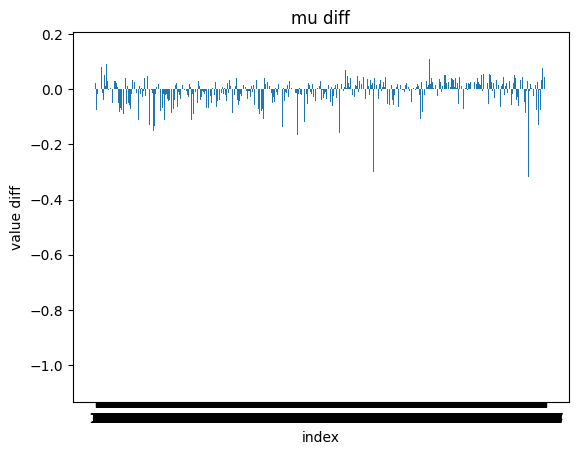

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# 棒グラフのx軸の位置 (インデックス)
x_positions = np.arange(len(c))

# 棒グラフを描画
plt.bar(x_positions, c)

# x軸のラベルを設定 (インデックスを表示)
plt.xticks(x_positions)

# グラフのタイトルや軸ラベルを設定 (オプション)
plt.title("mu diff")
plt.xlabel("index")
plt.ylabel("value diff")

# グラフを表示
plt.show()